# Tasks for laboratory assignment 3

In [1]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import plot_tree
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')


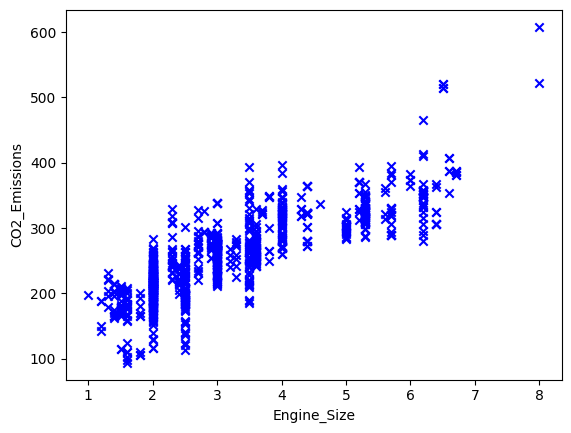

In [2]:
def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot('resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions').show()


In [3]:
def extract_texts_from_file(file_path):
    """
    Extract the text data from the csv file

    Args:
        file_path (str): Relative location of the csv file in the project.

    Returns:
        list: The list of texts as strings.
    """
    return pd.read_csv(file_path)

data = extract_texts_from_file('resources/heart.csv')
print(data[:50])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    63    1   3     145   233    1        0       150     0      2.3    0   
1    37    1   2     130   250    0        1       187     0      3.5    0   
2    41    0   1     130   204    0        0       172     0      1.4    2   
3    56    1   1     120   236    0        1       178     0      0.8    2   
4    57    0   0     120   354    0        1       163     1      0.6    2   
5    57    1   0     140   192    0        1       148     0      0.4    1   
6    56    0   1     140   294    0        0       153     0      1.3    1   
7    44    1   1     120   263    0        1       173     0      0.0    2   
8    52    1   2     172   199    1        1       162     0      0.5    2   
9    57    1   2     150   168    0        1       174     0      1.6    2   
10   54    1   0     140   239    0        1       160     0      1.2    2   
11   48    0   2     130   275    0        1       139     0    

## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

Fold 1: R-squared = 0.98
Fold 2: R-squared = 0.95
Fold 3: R-squared = 0.97
Fold 4: R-squared = 0.97
Fold 5: R-squared = 0.97

Average R-squared: 0.97
Test R-squared: 0.97


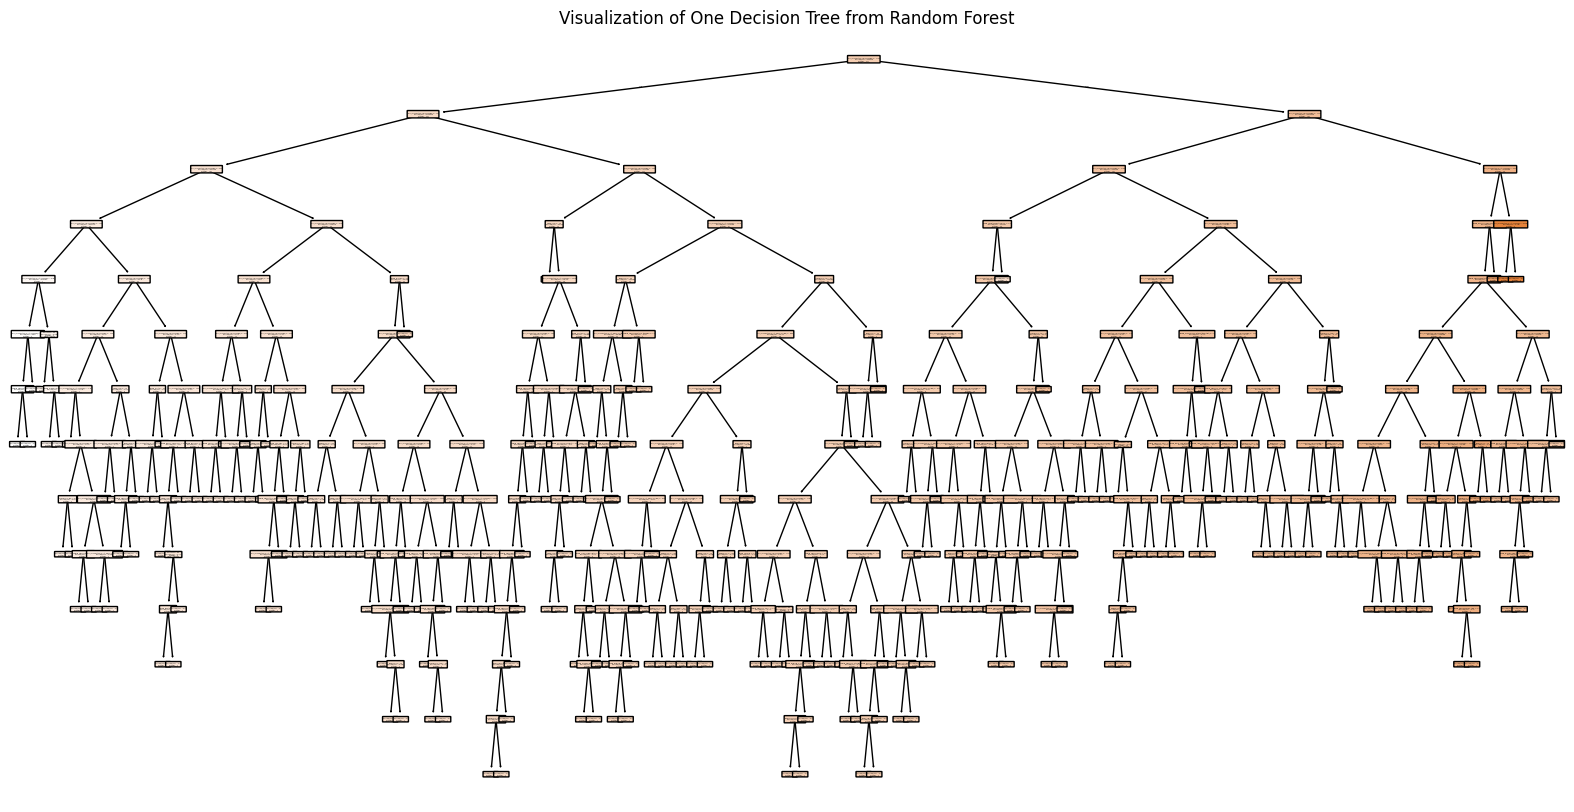

RandomForestRegressor(n_estimators=50, random_state=1111)

In [4]:
def CO2_emissions(data: pd.DataFrame):
    """
    Build a model that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

    Args:
        data: CO2 emissions data.

    Returns:
        list: The list of model theta parameters.
    """
    data = pd.get_dummies(data, columns=['Make', 'Model', 'Vehicle_Class', 'Transmission'], dtype=np.int64)
    data_size = len(data)
    train_size = round(0.8*data_size)
    data_train = data.iloc[:train_size, :]
    data_test = data.iloc[train_size:, :]

    y_test = data_test['CO2_Emissions']
    X_test = data_test.drop(columns=['CO2_Emissions'], inplace=False)

    y = data_train['CO2_Emissions']
    X = data_train.drop(columns=['CO2_Emissions'], inplace=False)
    
    kf = KFold(n_splits=5, shuffle=True, random_state=1111)

    r2_scores = []

    for train_idx, val_idx in kf.split(X):
        
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = RandomForestRegressor(n_estimators=50, random_state=1111)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        r2_cur = r2_score(y_val, y_pred)
        r2_scores.append(r2_cur)

    for i, r2_val in enumerate(r2_scores):
        print(f"Fold {i+1}: R-squared = {round(r2_val, 2)}")


    print(f"\nAverage R-squared: {round(np.mean(r2_scores), 2)}")
    y_pred_test = model.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"Test R-squared: {round(r2_test, 2)}")

    plt.figure(figsize=(20, 10))
    plot_tree(model.estimators_[0], feature_names=X.columns, filled=True, rounded=True)
    plt.title("Visualization of One Decision Tree from Random Forest")
    plt.show()
    
    return model

data = extract_texts_from_file('resources/CO2_emission.csv')
CO2_emissions(data)

#### Very nice, almost all variance is explained

## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

Fold 1: R-squared = 0.74
Fold 2: R-squared = 0.65
Fold 3: R-squared = 0.94
Fold 4: R-squared = 0.94
Fold 5: R-squared = 0.22

Average R-squared: 0.7
Test R-squared: 0.74


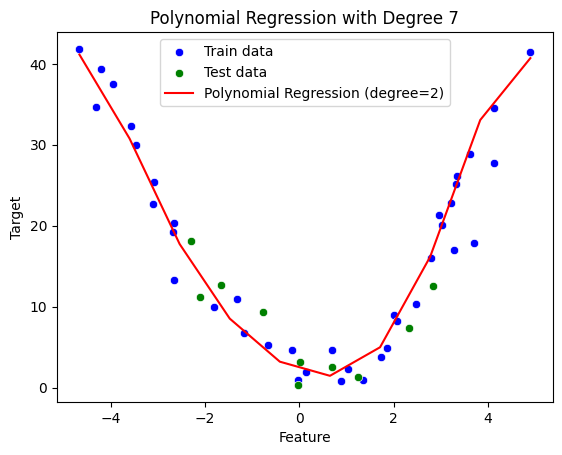

array([ 0.        , -2.12178948,  1.67712659,  0.21998079,  0.08340213,
       -0.00558254, -0.00357023])

In [5]:
def ice_cream_selling(data):
    """
    Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

    Args:
        data: ice cream sales data.

    Returns:
        list: The list of model theta parameters.
    """
    data = data.sample(frac=1, random_state=1111)
    
    data_size = len(data)
    train_size = round(0.8*data_size)
    data_train = data.iloc[:train_size, :]
    data_test = data.iloc[train_size:, :]

    y_test = data_test['Ice Cream Sales (units)']
    X_test = data_test.drop(columns=['Ice Cream Sales (units)'], inplace=False)

    y = data_train['Ice Cream Sales (units)']
    X = data_train.drop(columns=['Ice Cream Sales (units)'], inplace=False)
    
    
    

    kf = KFold(n_splits=5, shuffle=True, random_state=1111)

    r2_scores = []

    for train_idx, val_idx in kf.split(X):
        
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        poly = PolynomialFeatures(degree=6)
        X_train = poly.fit_transform(X_train)
        X_val = poly.transform(X_val)


        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        r2_cur = r2_score(y_val, y_pred)
        r2_scores.append(r2_cur)

    for i, r2_val in enumerate(r2_scores):
        print(f"Fold {i+1}: R-squared = {round(r2_val, 2)}")


    print(f"\nAverage R-squared: {round(np.mean(r2_scores), 2)}")

    poly = PolynomialFeatures(degree=6)
    
    X = poly.fit_transform(X)
    X_test = poly.transform(X_test)

    y_pred_test = model.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"Test R-squared: {round(r2_test, 2)}")
    
    X_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range = model.predict(X_range_poly)
    
    plt.figure()
    sns.scatterplot(data_train, x='Temperature (°C)', y='Ice Cream Sales (units)', color='blue', label='Train data')
    sns.scatterplot(data_test, x='Temperature (°C)', y='Ice Cream Sales (units)', color='green', label='Test data')
    plt.plot(X_range, y_range, color='red', label='Polynomial Regression (degree=2)')
    plt.title("Polynomial Regression with Degree 7")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend()
    plt.show()

    return model.coef_

data = extract_texts_from_file('resources/ice_cream_selling_data.csv')
ice_cream_selling(data)

## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

### I will use the Seasonal Autoregressive Integrated Moving Average with eXogenous inputs model (SARIMAX) as we deal here with time series

Test RMSE: 587.2128036421882


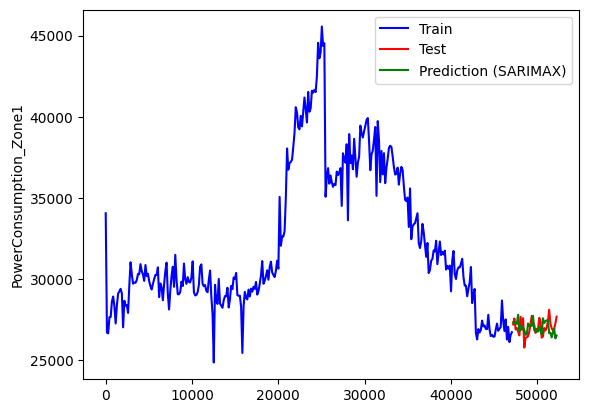

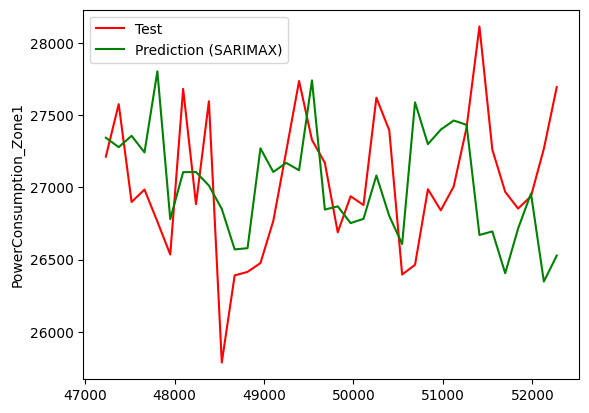

In [6]:
def power_consumption(data):
    """
    Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. 
    Visualize model on a plot.

    Args:
        data: power consumption data.

    Returns:
        list: The list of model theta parameters.
    """
    data = data[::144] # 1 point for each day as SARIMAX works tooooooo long with thousands of points
    ts_len = len(data)
    train_size = round(0.9*ts_len)
    data_train = data.iloc[:train_size, :]
    data_test = data.iloc[train_size:, :]

    ts_train = data_train['PowerConsumption_Zone1']
    ts_test = data_test['PowerConsumption_Zone1']
    exog_train = data_train.drop(columns=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'Datetime'], inplace=False)
    exog_test = data_test.drop(columns=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'Datetime'], inplace=False)
    

    model = SARIMAX(ts_train, exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 2, 12))
    model.initialize_approximate_diffuse()

    model = model.fit(disp=False)

    res = model.predict(start=len(ts_train), end=len(ts_train)+len(ts_test)-1, exog=exog_test)
    
    print(f'Test RMSE: {root_mean_squared_error(ts_test, res)}')
    
    plt.figure()
    sns.lineplot(ts_train, color='blue', label='Train')
    sns.lineplot(ts_test, color='red', label='Test')
    sns.lineplot(res, color='green', label='Prediction (SARIMAX)')

    plt.figure()
    sns.lineplot(ts_test, color='red', label='Test')
    sns.lineplot(res, color='green', label='Prediction (SARIMAX)')
    plt.show()

    return model

data = extract_texts_from_file('resources/powerconsumption.csv')
power_consumption(data)

## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

Best parameters: {'model__C': 0.01}
Best cv F1-score: 0.8445148046426757
Test F1-score: 0.8787878787878788


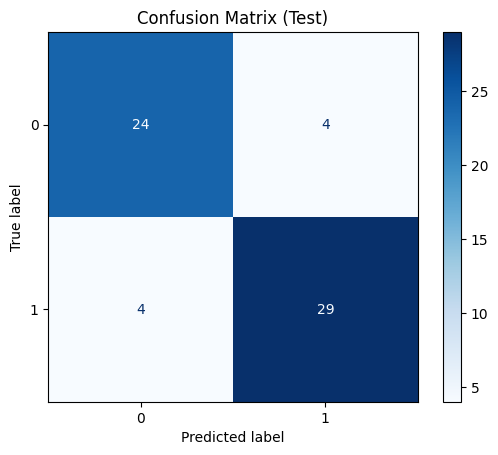

GridSearchCV(cv=KFold(n_splits=5, random_state=1111, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100]}, scoring='f1')

In [7]:
def heart_classification(data):
    """
    Build a model, that would classify risk category for heart attack. 
    Visualize model on a plot.

    Args:
        data: heart medical data.

    Returns:
        list: The list of model theta parameters.
    """
    data = data.sample(frac=1, random_state=1111)
    
    data_size = len(data)
    train_size = round(0.8*data_size)
    data_train = data.iloc[:train_size, :]
    data_test = data.iloc[train_size:, :]

    y_test = data_test['output']
    X_test = data_test.drop(columns=['output'], inplace=False)

    y = data_train['output']
    X = data_train.drop(columns=['output'], inplace=False)

    kf = KFold(n_splits=5, shuffle=True, random_state=1111)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(solver='lbfgs'))
    ])

    param_grid = {'model__C': [0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='f1')
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best parameters:", best_params)
    print("Best cv F1-score:", best_score)

    y_pred = grid_search.predict(X_test)

    test_f1 = f1_score(y_test, y_pred)
    print("Test F1-score:", test_f1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_search.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix (Test)')
    plt.show()
    return grid_search

data = extract_texts_from_file('resources/heart.csv')
heart_classification(data)

## Additional (extra credit)

There are more files in the `resources` folder. Take a look at the. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.

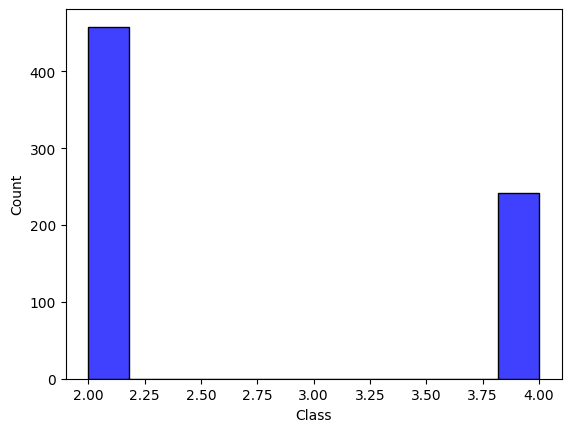

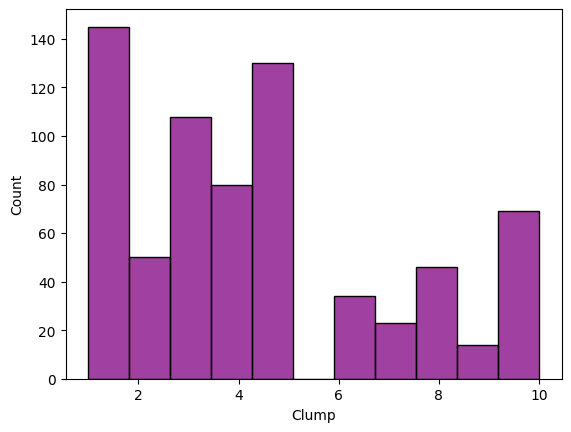

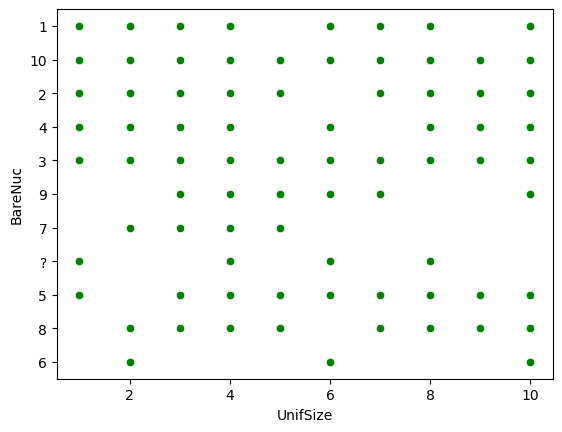

Best parameters: {'model__max_depth': 10, 'model__n_estimators': 200}
Best cv F1-score: 0.9598170605266999
Test F1-score: 0.972972972972973


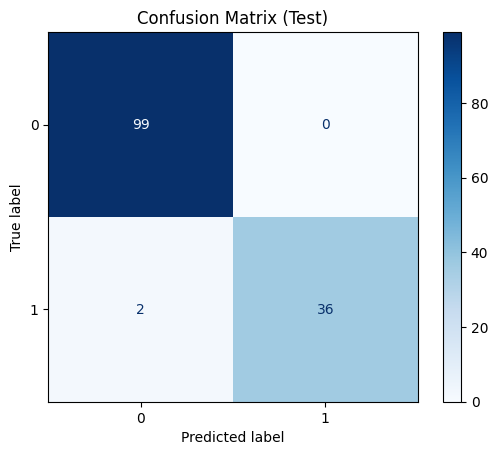

GridSearchCV(cv=KFold(n_splits=5, random_state=1111, shuffle=True),
             estimator=Pipeline(steps=[('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__n_estimators': [50, 100, 200]},
             scoring='f1')

In [8]:
def cell_classification(data):
    # Viz
    plt.figure()
    sns.histplot(data, x='Class', color='blue')
    plt.show()

    plt.figure()
    sns.histplot(data, x='Clump', color='purple')
    plt.show()

    plt.figure()
    sns.scatterplot(data, x='UnifSize', y='BareNuc', color='green')
    plt.show()

    # Modelling
    data = data[~data.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)]
    data['Class'] = data['Class'].replace(2, 0)
    data['Class'] = data['Class'].replace(4, 1)
    
    data = data.sample(frac=1, random_state=1111)
    
    data_size = len(data)
    train_size = round(0.8*data_size)
    data_train = data.iloc[:train_size, :]
    data_test = data.iloc[train_size:, :]

    y_test = data_test['Class']
    X_test = data_test.drop(columns=['Class'], inplace=False)

    y = data_train['Class']
    X = data_train.drop(columns=['Class'], inplace=False)

    kf = KFold(n_splits=5, shuffle=True, random_state=1111)

    pipeline = Pipeline([
        ('model', RandomForestClassifier())
    ])

    param_grid = {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30]
    }
    grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='f1')
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best parameters:", best_params)
    print("Best cv F1-score:", best_score)

    y_pred = grid_search.predict(X_test)

    test_f1 = f1_score(y_test, y_pred)
    print("Test F1-score:", test_f1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_search.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix (Test)')
    plt.show()
    return grid_search


data = extract_texts_from_file('resources/cell_samples.csv')
cell_classification(data)